In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [9]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [11]:
import matplotlib.pyplot as plt
import numpy as np 

In [18]:
def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

In [21]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

In [16]:
labels.shape

torch.Size([4])

In [24]:
images.shape

torch.Size([4, 3, 32, 32])

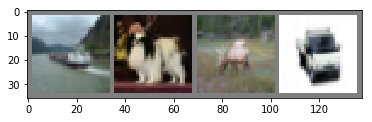

In [22]:
imshow(torchvision.utils.make_grid(images))

In [23]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

 ship   dog  deer truck


In [25]:
import torch.nn as nn
import torch.nn.functional as F

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) # in_channel, out_channel , kernel_size
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x): # x는 입력값
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # 펼치기 ( OUT_CHANNEL * SUBSAMPLE_SHAPRE)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [29]:
net = Net()

In [32]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001, momentum=0.9) # momentum : 관성 ->기울기가 꺽이는 부분 해결하기 위함 = 아담

In [35]:
# 데이터셋 다 드는 횟수 = epoch
for epoch in range(2):
    
    running_loss = 0.0
    for i,data in enumerate(trainloader,0) :# Index 빠져나옴
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
            
print('Finished Training')

[1,   200] loss: 2.151
[1,   400] loss: 2.072
[1,   600] loss: 2.064
[1,   800] loss: 2.008
[1,  1000] loss: 1.980
[1,  1200] loss: 1.992
[1,  1400] loss: 1.934
[1,  1600] loss: 1.907
[1,  1800] loss: 1.910
[1,  2000] loss: 1.856
[1,  2200] loss: 1.815
[1,  2400] loss: 1.823
[1,  2600] loss: 1.795
[1,  2800] loss: 1.806
[1,  3000] loss: 1.761
[1,  3200] loss: 1.724
[1,  3400] loss: 1.720
[1,  3600] loss: 1.685
[1,  3800] loss: 1.694
[1,  4000] loss: 1.671
[1,  4200] loss: 1.701
[1,  4400] loss: 1.635
[1,  4600] loss: 1.641
[1,  4800] loss: 1.649
[1,  5000] loss: 1.624
[1,  5200] loss: 1.604
[1,  5400] loss: 1.648
[1,  5600] loss: 1.532
[1,  5800] loss: 1.608
[1,  6000] loss: 1.552
[1,  6200] loss: 1.639
[1,  6400] loss: 1.546
[1,  6600] loss: 1.536
[1,  6800] loss: 1.577
[1,  7000] loss: 1.597
[1,  7200] loss: 1.634
[1,  7400] loss: 1.543
[1,  7600] loss: 1.470
[1,  7800] loss: 1.530
[1,  8000] loss: 1.535
[1,  8200] loss: 1.512
[1,  8400] loss: 1.502
[1,  8600] loss: 1.467
[1,  8800] 

GroundTruth:    cat  ship  ship plane


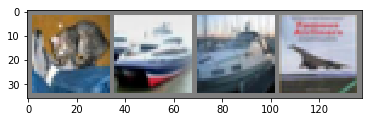

In [37]:
dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [45]:
outputs=net(images)
outputs

tensor([[-0.5759, -1.9934, -0.1035,  2.9081, -0.1965,  2.1618,  1.1461, -0.9467,
         -0.4882, -2.0352],
        [ 5.5454,  6.5375, -2.6274, -3.5413, -3.6268, -5.7657, -6.1213, -4.4932,
          7.8308,  4.0046],
        [ 2.5824,  2.1706, -0.9358, -1.1341, -1.2770, -2.6487, -3.5523, -1.5305,
          3.6810,  2.0638],
        [ 3.1788,  0.6669,  0.2800, -1.3869, -0.4140, -2.5766, -2.7350, -2.0554,
          3.1111,  1.1529]], grad_fn=<ThAddmmBackward>)

In [44]:
outputs.data

tensor([[-0.5759, -1.9934, -0.1035,  2.9081, -0.1965,  2.1618,  1.1461, -0.9467,
         -0.4882, -2.0352],
        [ 5.5454,  6.5375, -2.6274, -3.5413, -3.6268, -5.7657, -6.1213, -4.4932,
          7.8308,  4.0046],
        [ 2.5824,  2.1706, -0.9358, -1.1341, -1.2770, -2.6487, -3.5523, -1.5305,
          3.6810,  2.0638],
        [ 3.1788,  0.6669,  0.2800, -1.3869, -0.4140, -2.5766, -2.7350, -2.0554,
          3.1111,  1.1529]])

In [40]:
_, predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [41]:
outputs

tensor([[-0.5759, -1.9934, -0.1035,  2.9081, -0.1965,  2.1618,  1.1461, -0.9467,
         -0.4882, -2.0352],
        [ 5.5454,  6.5375, -2.6274, -3.5413, -3.6268, -5.7657, -6.1213, -4.4932,
          7.8308,  4.0046],
        [ 2.5824,  2.1706, -0.9358, -1.1341, -1.2770, -2.6487, -3.5523, -1.5305,
          3.6810,  2.0638],
        [ 3.1788,  0.6669,  0.2800, -1.3869, -0.4140, -2.5766, -2.7350, -2.0554,
          3.1111,  1.1529]], grad_fn=<ThAddmmBackward>)

In [46]:
correct = 0 
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %
